### Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

In [1]:
# Load the dataset:

import pandas as pd

df = pd.read_csv(r"C:\Users\SHREYAS\Desktop\sales_data_with_discounts.csv")

In [2]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [3]:
df.shape

(450, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [5]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [7]:
# Identify numerical columns:

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print(numerical_cols)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [9]:
# Calculate the mean, median, mode, and standard deviation for these columns.
stats = df[numerical_cols].agg(['mean', 'median', 'std'])
print(stats)

          Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
mean    5.066667  10453.433333       33812.835556          15.155242   
median  4.000000   1450.000000        5700.000000          16.577766   
std     4.231602  18079.904840       50535.074173           4.220602   

        Discount Amount  Net Sales Value  
mean        3346.499424     30466.336131  
median       988.933733      4677.788059  
std         4509.902963     46358.656624  


In [12]:
stats1 = df[numerical_cols].agg(['mode'])
print(stats1)

    Volume Avg Price Total Sales Value Discount Rate (%) Discount Amount  \
      mode      mode              mode              mode            mode   
0      3.0     400.0           24300.0          5.007822       69.177942   
1      NaN     450.0               NaN          5.055218       73.025199   
2      NaN     500.0               NaN          5.059801       93.649161   
3      NaN    1300.0               NaN          5.072124       94.682735   
4      NaN    8100.0               NaN          5.084108      102.705757   
..     ...       ...               ...               ...             ...   
445    NaN       NaN               NaN         19.940610    17900.983733   
446    NaN       NaN               NaN         19.965340    21153.498820   
447    NaN       NaN               NaN         19.976879    21496.675367   
448    NaN       NaN               NaN         19.982257    25328.224204   
449    NaN       NaN               NaN         19.992407    25738.022194   

    Net Sal

## Data Visualization

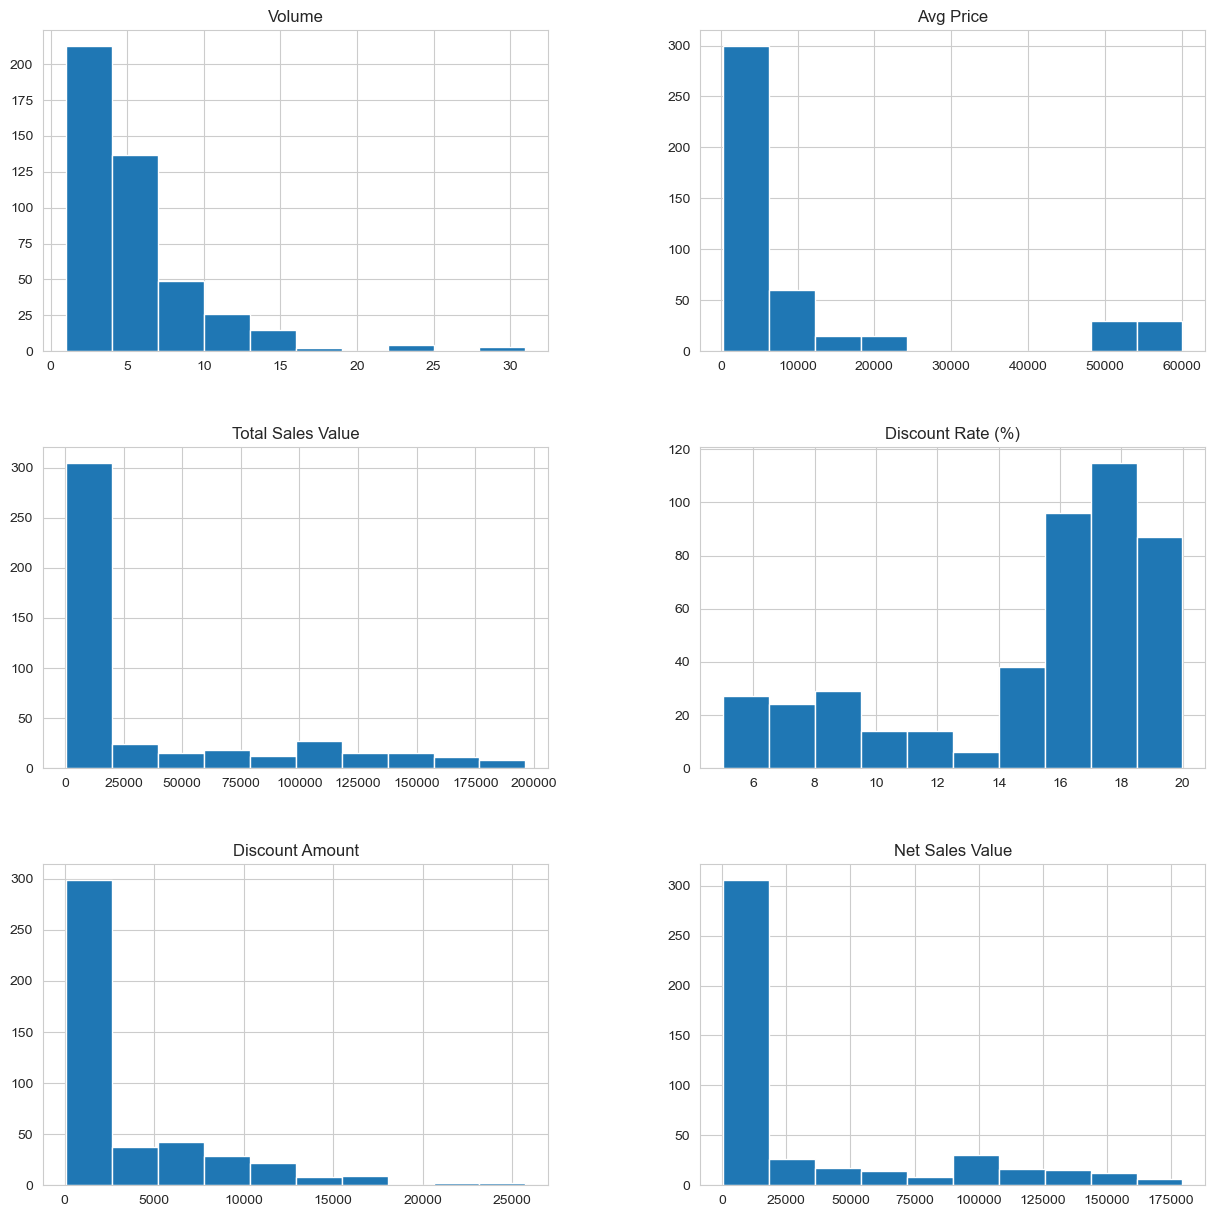

In [24]:
# Histograms:

import matplotlib.pyplot as plt
df[numerical_cols].hist(figsize=(15, 15))
plt.show()

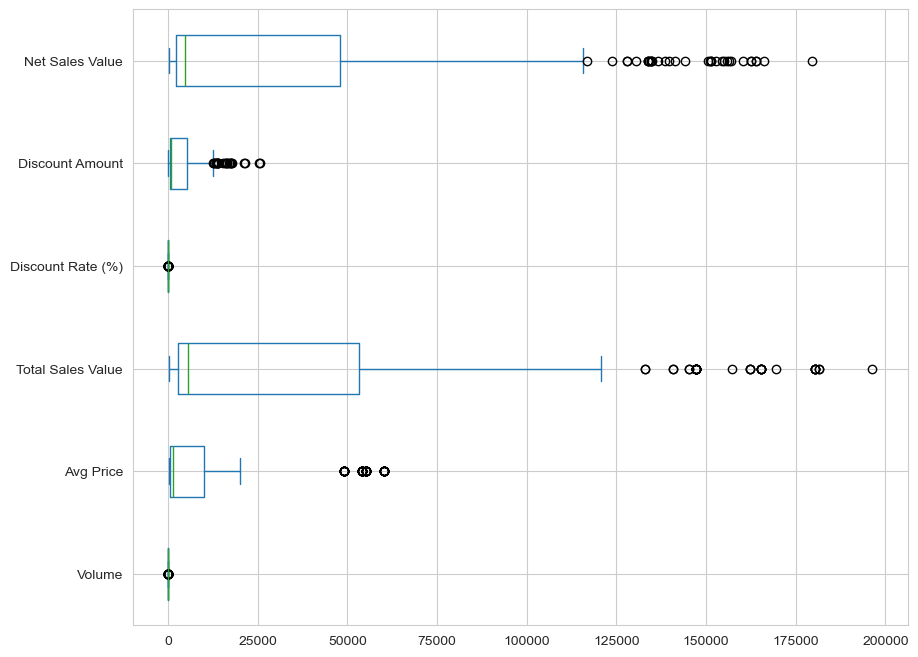

In [31]:
# Boxplots:

df[numerical_cols].plot(kind='box', figsize=(10, 8), vert = False)
plt.show()

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


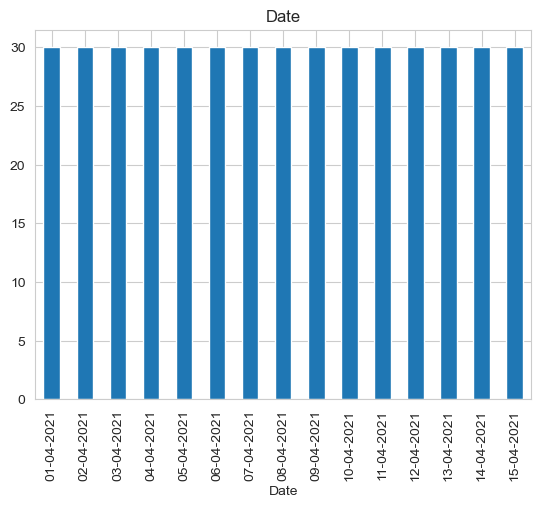

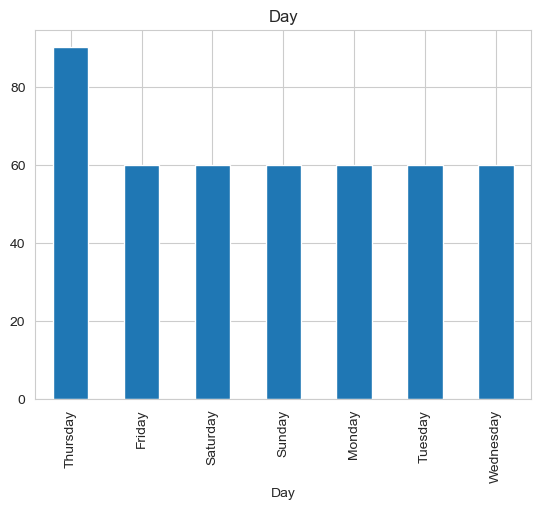

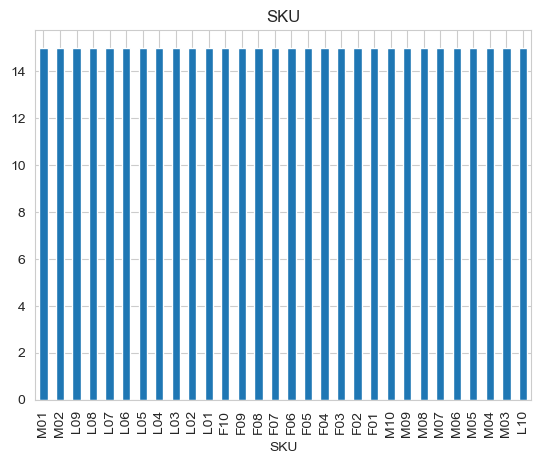

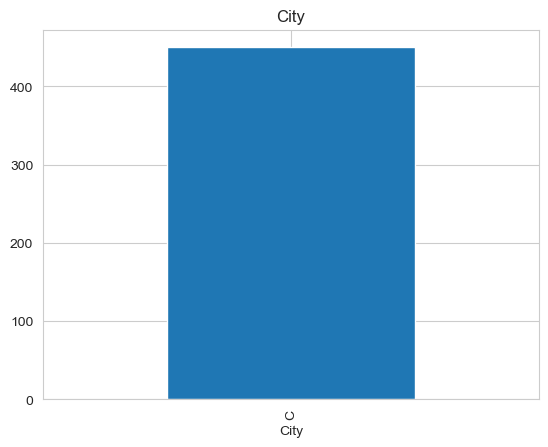

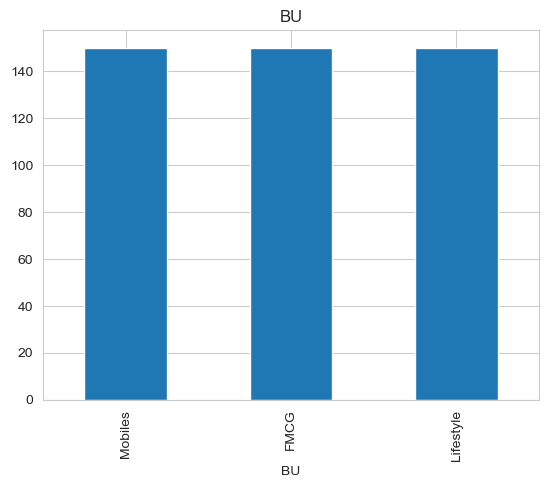

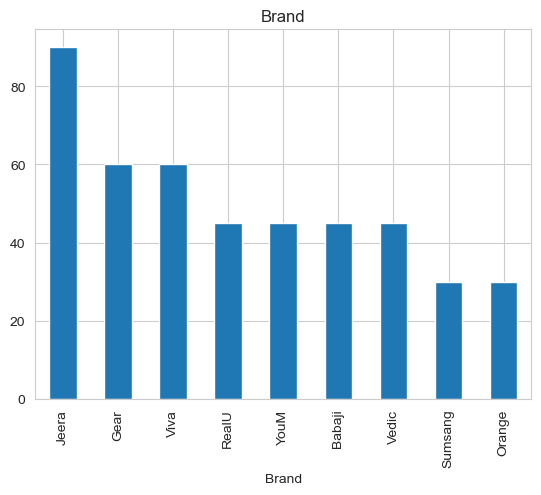

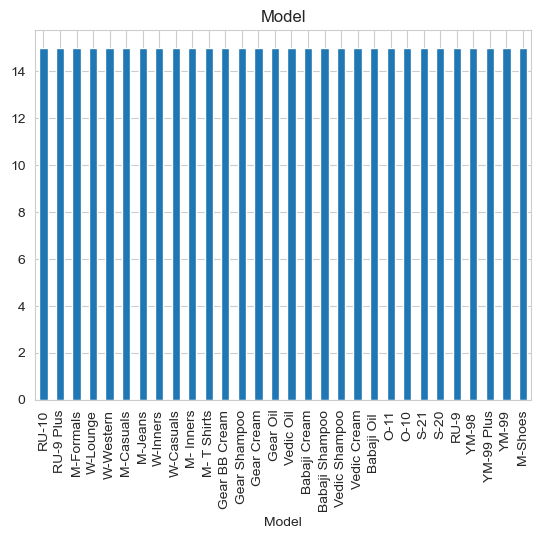

In [40]:
# Bar Chart Analysis for Categorical Column:

categorical_cols = df.select_dtypes(include=['object']).columns

print(categorical_cols)

for col in categorical_cols:
    df[col].value_counts().plot(kind="bar")
    plt.title(col)
    plt.show()

## Standardization of Numerical Variables

- Formula:    z= x−μ / σ (z=x-mu/sigma)


<Axes: ylabel='Density'>

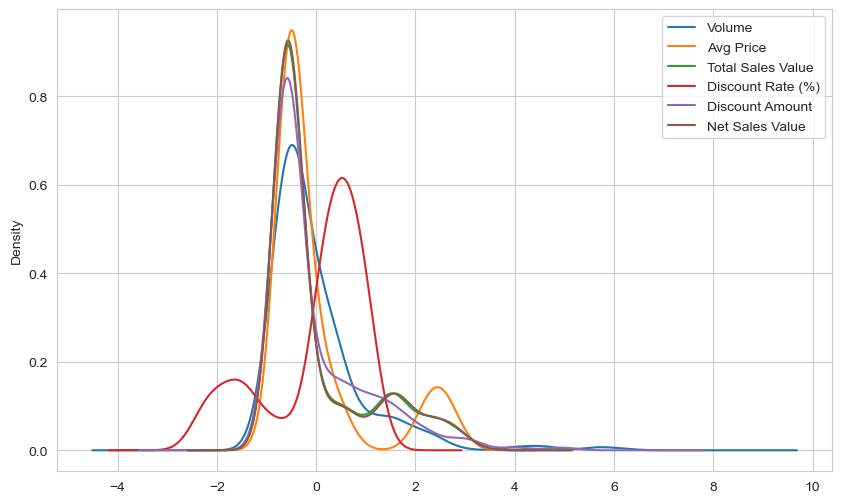

In [50]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical columns
df[numerical_cols] = StandardScaler().fit_transform(df[numerical_cols])
df[numerical_cols].plot(kind='kde', figsize=(10, 6))

## Conversion of Categorical Data into Dummy Variables


- Why Convert Categorical Data into Dummy Variables?
Machine learning models typically work with numerical data, so categorical variables (like "City", "Brand", "Model") must be converted into a numerical format. One-hot encoding is a common technique that:
1) Creates separate columns for each unique category.
2) Assigns 1 or 0 based on whether the category is present.
3) Prevents models from misinterpreting categorical values as ordinal (ordered) numbers.

In [51]:
cat_cols = ["Day", "SKU", "City", "BU", "Brand", "Model"]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Display 
df_encoded.head()


,Date,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Monday,Day_Saturday,Day_Sunday,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,01-04-2021,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,01-04-2021,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,01-04-2021,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,01-04-2021,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,01-04-2021,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# Conclusion

### Key Findings from Descriptive Analytics & Visualizations
- The Volume of sales is typically low, with a median of 4 units per transaction.
- Average Price follows a bimodal distribution, indicating two major pricing groups.
- Total Sales Value & Net Sales Value are right-skewed, meaning a few high-value transactions dominate revenue.
- Discount Rate (%) is normally distributed, mostly between 10% and 20%.
- Outliers were detected in Total Sales Value, Discount Amount, and Net Sales Value, which may indicate high-value sales.
- Categorical data analysis showed varying distributions, with some brands or cities contributing significantly more to sales.


### Importance of Data Preprocessing
1) Standardization (Z-score Normalization):
    - Ensures numerical features have the same scale, improving model performance.
    - Prevents some features from dominating others due to large numerical ranges.
2) One-Hot Encoding for Categorical Data:
    - Converts categorical values into numerical format so that machine learning models can interpret them.
    - Helps models avoid misinterpreting categorical labels as ordered values.
    - Prevents bias in algorithms that assume numerical order.

- By performing descriptive analytics and data preprocessing, the dataset becomes clean, structured, and ready for further analysis, such as predictive modeling and machine learning. 